![Numbers](images/numpy/numbers.jpg)

Photo by [Nick Hillier](https://unsplash.com/photos/yD5rv8_WzxA?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/search/photos/numbers?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)

In [1]:
from IPython.display import HTML
from pathlib import Path

css_rules = Path('custom.css').read_text()
HTML('<style>' + css_rules + '</style>')

# Motivación

En su [definición](http://www.numpy.org/#numpy) de la página oficial de **NumPy**:

> NumPy es el paquete fundamental para computación científica con Python.

$\Rightarrow$ [NumPy tiene una ingente cantidad de módulos y funciones](https://docs.scipy.org/doc/numpy/reference/index.html)

![Numpy usage](images/numpy/numpy_usage.png)

Fuente: [Python Developers Survey 2018](https://www.jetbrains.com/research/python-developers-survey-2018/)

# Guión

1. [Instalación](#Instalaci%C3%B3n)
2. [Creación de arrays](#Creaci%C3%B3n-de-arrays)
3. [Funciones predefinidas para crear arrays](#Funciones-predefinidas-para-crear-arrays)
4. [Acceso, borrado e inserción de elementos en arrays](#Acceso,-borrado-e-inserci%C3%B3n-de-elementos-en-arrays)
5. [*Slicing* de arrays](#Slicing-de-arrays)
6. [Indexado booleano, operaciones de conjunto y ordenación](#Indexado-booleano,-operaciones-de-conjunto-y-ordenaci%C3%B3n)
7. [Operaciones aritméticas y *broadcasting*](#Operaciones-aritm%C3%A9ticas-y-broadcasting)
8. [Álgebra lineal](#%C3%81lgebra-lineal)


# Instalación
---

![Instalación Numpy](images/numpy/numpy_installation.png)

# Creación de arrays
---

# `ndarray`

En el núcleo de NumPy está el **ndarray**, donde **nd** es por *n-dimensional*. Un ndarray es un **array multidimensional** de elementos **del mismo tipo**.

In [2]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
print('x =', x)

x = [1 2 3 4 5]


In [3]:
print('x has dimension: ', x.ndim)
print('x has size: ', x.size)
print('x has shape:', x.shape)
print('x is an object of type:', type(x))
print('The elements in x are of type:', x.dtype)

x has dimension:  1
x has size:  5
x has shape: (5,)
x is an object of type: <class 'numpy.ndarray'>
The elements in x are of type: int64


# ndarrays con tipos heterogéneos. Me engañaron!

In [4]:
x = np.array([4, 'Einstein', 1e-7])

Se produce (*de forma implícita*) una [coerción de tipos](http://diccionario.raing.es/es/lema/coerci%C3%B3n-de-tipos) a **Unicode**:

In [5]:
print('x has dimension: ', x.ndim)
print('x has size: ', x.size)
print('x has shape:', x.shape)
print('x is an object of type:', type(x))
print('The elements in x are of type:', x.dtype)

x has dimension:  1
x has size:  3
x has shape: (3,)
x is an object of type: <class 'numpy.ndarray'>
The elements in x are of type: <U21


# Tipos de datos en NumPy

Como hemos visto, los arrays en NumPy tienen que ser de un [tipo fijo](https://www.numpy.org/devdocs/user/basics.types.html). Veamos los tipos numéricos más usados y sus características:

dtype | Descripción | Rango
- | - | -
np.int32 | Integer | -2147483648 to 2147483647
np.int64 | Integer (**por defecto**) | -9223372036854775808 to 9223372036854775807
np.uint32 | Unsigned integer | 0 to 4294967295
np.uint64 | Unsigned integer | 0 to 18446744073709551615
np.float32 | Float | -3.4028235e+38 to 3.4028235e+38
np.float64 | Float (**por defecto**) | -1.7976931348623157e+308 to 1.7976931348623157e+308

## Creando ndarrays con distintos tipos de datos

In [6]:
values = list(range(10))

array_int32 = np.array(values, dtype='int32')
array_int64 = np.array(values, dtype='int64')      # entero por defecto

array_float32 = np.array(values, dtype='float32')
array_float64 = np.array(values, dtype='float64')  # flotante por defecto

In [7]:
array_int32

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [8]:
array_int64

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
array_float32

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [10]:
array_float64

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

# ¿Por qué ndarrays en vez de listas?

In [11]:
array_as_list = list(range(int(10e6)))
array_as_ndarray = np.array(array_as_list)

In [12]:
%timeit sum(array_as_list)

80.9 ms ± 674 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%timeit array_as_ndarray.sum()

6.2 ms ± 79.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Mezclando enteros y flotantes

In [14]:
x = np.array([1, 2, 3])
y = np.array([1.0, 2.0, 3.0])
z = np.array([1, 2.5, 4])

In [15]:
print('The elements in x are of type:', x.dtype)
print('The elements in y are of type:', y.dtype)
print('The elements in z are of type:', z.dtype)

The elements in x are of type: int64
The elements in y are of type: float64
The elements in z are of type: float64


In [16]:
w = np.array([1.5, 2.2, 3.7, 4.0, 5.9], dtype = np.int64)
print(w, w.dtype)

[1 2 3 4 5] int64


# Convirtiendo arrays ya creados

In [17]:
x

array([1, 2, 3])

In [18]:
x.astype(float)

array([1., 2., 3.])

In [19]:
y

array([1., 2., 3.])

In [20]:
y.astype(int)

array([1, 2, 3])

# Matrices

$$
M=
  \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
    7 & 8 & 9 \\
    10 & 11 & 12
  \end{bmatrix}
$$

In [21]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
M

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [22]:
print('M has dimension: ', M.ndim)
print('M has size: ', M.size)
print('M has shape (rows, columns):', M.shape)
print('M is an object of type:', type(M))
print('The elements in M are of type:', M.dtype)

M has dimension:  2
M has size:  12
M has shape (rows, columns): (4, 3)
M is an object of type: <class 'numpy.ndarray'>
The elements in M are of type: int64


## 💡Ejercicio

Cree los siguientes arrays en NumPy:

`array1` =
$
\begin{align*}
  \begin{bmatrix}
    88 & 23 & 39 & 41
  \end{bmatrix}
\end{align*}
$
(como array unidimensional)

`array2` =
$
\begin{align*}
  \begin{bmatrix}
    76.4 & 21.7 & 38.4 \\
    41.2 & 52.8 & 68.9
  \end{bmatrix}
\end{align*}
$

`array3` =
$
\begin{align*}
  \begin{bmatrix}
    12 \\
    a \\
    9 \\
    b
  \end{bmatrix}
\end{align*}
$

, y obtenga los siguientes parámetros de cada uno de ellos:

- Dimensión.
- Tamaño.
- Forma.
- Tipo.
- Tipo de los elementos.

In [23]:
# Write your code here!

## ⭐️ Solución

In [24]:
# %load "solutions/numpy/first_arrays.py"

# Convirtiendo arrays a listas

In [25]:
M

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [26]:
M.tolist()

[[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]

# Guardando y cargando arrays

In [27]:
M

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [28]:
# esto crea un fichero binario con el nombre my_matrix.npy
np.save('resources/numpy/my_matrix', M)

In [29]:
M_reloaded = np.load('resources/numpy/my_matrix.npy')

In [30]:
M_reloaded

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

El formato de fichero `.npy` es de tipo binario ([ver descripción](https://www.numpy.org/devdocs/reference/generated/numpy.lib.format.html))

# Guardando y cargando arrays con ficheros `.csv`

In [31]:
M

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [32]:
np.savetxt("resources/numpy/my_matrix.csv", M)

In [33]:
# %load "resources/numpy/my_matrix.csv"
1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00
4.000000000000000000e+00 5.000000000000000000e+00 6.000000000000000000e+00
7.000000000000000000e+00 8.000000000000000000e+00 9.000000000000000000e+00
1.000000000000000000e+01 1.100000000000000000e+01 1.200000000000000000e+01


SyntaxError: invalid syntax (<ipython-input-33-bdf1a759ecfd>, line 2)

In [34]:
np.loadtxt("resources/numpy/my_matrix.csv")

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

## Cargando columnas en variables independientes

In [35]:
# %load "resources/numpy/my_matrix.csv"
1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00
4.000000000000000000e+00 5.000000000000000000e+00 6.000000000000000000e+00
7.000000000000000000e+00 8.000000000000000000e+00 9.000000000000000000e+00
1.000000000000000000e+01 1.100000000000000000e+01 1.200000000000000000e+01


SyntaxError: invalid syntax (<ipython-input-35-bdf1a759ecfd>, line 2)

In [36]:
x, y, z = np.loadtxt("resources/numpy/my_matrix.csv", unpack=True)

In [37]:
x

array([ 1.,  4.,  7., 10.])

In [38]:
y

array([ 2.,  5.,  8., 11.])

In [39]:
z

array([ 3.,  6.,  9., 12.])

# Funciones predefinidas para crear arrays
---

# Ceros

In [40]:
import os

X = np.zeros((3, 4))

print(X, end=2 * os.linesep)

print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

X has shape: (3, 4)
The elements in X are of type: float64


## Ceros (desde otro array)

Podemos necesitar tener un array de ceros con la misma forma que otro:

In [41]:
np.zeros_like(X)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Esto equivale a crear un array de ceros pero con la ventaja de no tener que especificar dimensiones:

In [42]:
np.zeros(X.shape)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# Unos

In [43]:
X = np.ones((2, 3))    # también existe np.ones_like

print(X, end=2 * os.linesep)

print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[1. 1. 1.]
 [1. 1. 1.]]

X has shape: (2, 3)
The elements in X are of type: float64


Por defecto NumPy establece el tipo de los elementos a `float64` pero podemos cambiar este comportamiento pasando el parámetro `dtype` al llamar a la función generadora:

In [44]:
np.ones((3, 2), dtype=np.int64)

array([[1, 1],
       [1, 1],
       [1, 1]])

# Mismo valor

In [45]:
X = np.full((3, 3), 7)    # también existe np.full_like

print(X, end=2 * os.linesep)

print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[7 7 7]
 [7 7 7]
 [7 7 7]]

X has shape: (3, 3)
The elements in X are of type: int64


# Matriz identidad

In [46]:
X = np.eye(5)

print(X, end=2 * os.linesep)

print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

X has shape: (5, 5)
The elements in X are of type: float64


# Matriz diagonal

In [47]:
X = np.diag([5, 4, 3, 2, 1])

print(X, end=2 * os.linesep)

print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[5 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]

X has shape: (5, 5)
The elements in X are of type: int64


## 💡Ejercicio

Cree la siguiente matriz:

`diagonal` =
$
\begin{bmatrix} 
    0      & 0      & 0 & \dots & 0\\
    0      & 1      & 0 & \dots & 0\\
    0      & 0      & 2 & \dots & 0\\
    \vdots & \vdots & 0 & \ddots & 0\\
    0      & 0      & 0 & \dots & 49\\
    \end{bmatrix}
$

, y obtenga los siguientes parámetros de la misma:

- Dimensión.
- Tamaño.
- Forma.
- Tipo.
- Tipo de los elementos.

In [48]:
# Write your code here!

## ⭐️ Solución

In [49]:
# %load "solutions/numpy/diag_array.py"

# Arrays con valores enteros equiespaciados

In [50]:
X = np.arange(21)     # queda excluido límite superior

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has size:', X.size)
print('The elements in X are of type:', X.dtype)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

X has dimension: 1
X has size: 21
The elements in X are of type: int64


In [51]:
X = np.arange(6, 60)     # queda excluido límite superior

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has size:', X.size)
print('The elements in X are of type:', X.dtype)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

X has dimension: 1
X has size: 54
The elements in X are of type: int64


In [52]:
X = np.arange(6, 60, 3)

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has size:', X.size)
print('The elements in X are of type:', X.dtype)

[ 6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57]

X has dimension: 1
X has size: 18
The elements in X are of type: int64


# Arrays con valores flotantes equiespaciados

### Especificando el "paso"

In [53]:
np.arange(6, 60, .3)

array([ 6. ,  6.3,  6.6,  6.9,  7.2,  7.5,  7.8,  8.1,  8.4,  8.7,  9. ,
        9.3,  9.6,  9.9, 10.2, 10.5, 10.8, 11.1, 11.4, 11.7, 12. , 12.3,
       12.6, 12.9, 13.2, 13.5, 13.8, 14.1, 14.4, 14.7, 15. , 15.3, 15.6,
       15.9, 16.2, 16.5, 16.8, 17.1, 17.4, 17.7, 18. , 18.3, 18.6, 18.9,
       19.2, 19.5, 19.8, 20.1, 20.4, 20.7, 21. , 21.3, 21.6, 21.9, 22.2,
       22.5, 22.8, 23.1, 23.4, 23.7, 24. , 24.3, 24.6, 24.9, 25.2, 25.5,
       25.8, 26.1, 26.4, 26.7, 27. , 27.3, 27.6, 27.9, 28.2, 28.5, 28.8,
       29.1, 29.4, 29.7, 30. , 30.3, 30.6, 30.9, 31.2, 31.5, 31.8, 32.1,
       32.4, 32.7, 33. , 33.3, 33.6, 33.9, 34.2, 34.5, 34.8, 35.1, 35.4,
       35.7, 36. , 36.3, 36.6, 36.9, 37.2, 37.5, 37.8, 38.1, 38.4, 38.7,
       39. , 39.3, 39.6, 39.9, 40.2, 40.5, 40.8, 41.1, 41.4, 41.7, 42. ,
       42.3, 42.6, 42.9, 43.2, 43.5, 43.8, 44.1, 44.4, 44.7, 45. , 45.3,
       45.6, 45.9, 46.2, 46.5, 46.8, 47.1, 47.4, 47.7, 48. , 48.3, 48.6,
       48.9, 49.2, 49.5, 49.8, 50.1, 50.4, 50.7, 51

# Arrays con valores flotantes equiespaciados

### Especificando el número de elementos

In [54]:
X = np.linspace(6, 60)     # 50 elementos por defecto

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has size:', X.size)
print('The elements in X are of type:', X.dtype)

[ 6.          7.10204082  8.20408163  9.30612245 10.40816327 11.51020408
 12.6122449  13.71428571 14.81632653 15.91836735 17.02040816 18.12244898
 19.2244898  20.32653061 21.42857143 22.53061224 23.63265306 24.73469388
 25.83673469 26.93877551 28.04081633 29.14285714 30.24489796 31.34693878
 32.44897959 33.55102041 34.65306122 35.75510204 36.85714286 37.95918367
 39.06122449 40.16326531 41.26530612 42.36734694 43.46938776 44.57142857
 45.67346939 46.7755102  47.87755102 48.97959184 50.08163265 51.18367347
 52.28571429 53.3877551  54.48979592 55.59183673 56.69387755 57.79591837
 58.89795918 60.        ]

X has dimension: 1
X has size: 50
The elements in X are of type: float64


In [55]:
X = np.linspace(6, 60, 75)

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has size:', X.size)
print('The elements in X are of type:', X.dtype)

[ 6.          6.72972973  7.45945946  8.18918919  8.91891892  9.64864865
 10.37837838 11.10810811 11.83783784 12.56756757 13.2972973  14.02702703
 14.75675676 15.48648649 16.21621622 16.94594595 17.67567568 18.40540541
 19.13513514 19.86486486 20.59459459 21.32432432 22.05405405 22.78378378
 23.51351351 24.24324324 24.97297297 25.7027027  26.43243243 27.16216216
 27.89189189 28.62162162 29.35135135 30.08108108 30.81081081 31.54054054
 32.27027027 33.         33.72972973 34.45945946 35.18918919 35.91891892
 36.64864865 37.37837838 38.10810811 38.83783784 39.56756757 40.2972973
 41.02702703 41.75675676 42.48648649 43.21621622 43.94594595 44.67567568
 45.40540541 46.13513514 46.86486486 47.59459459 48.32432432 49.05405405
 49.78378378 50.51351351 51.24324324 51.97297297 52.7027027  53.43243243
 54.16216216 54.89189189 55.62162162 56.35135135 57.08108108 57.81081081
 58.54054054 59.27027027 60.        ]

X has dimension: 1
X has size: 75
The elements in X are of type: float64


## Intervalo abierto $[a, b)$

In [56]:
X = np.linspace(6, 60, 75, endpoint=False)

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has size:', X.size)
print('The elements in X are of type:', X.dtype)

[ 6.    6.72  7.44  8.16  8.88  9.6  10.32 11.04 11.76 12.48 13.2  13.92
 14.64 15.36 16.08 16.8  17.52 18.24 18.96 19.68 20.4  21.12 21.84 22.56
 23.28 24.   24.72 25.44 26.16 26.88 27.6  28.32 29.04 29.76 30.48 31.2
 31.92 32.64 33.36 34.08 34.8  35.52 36.24 36.96 37.68 38.4  39.12 39.84
 40.56 41.28 42.   42.72 43.44 44.16 44.88 45.6  46.32 47.04 47.76 48.48
 49.2  49.92 50.64 51.36 52.08 52.8  53.52 54.24 54.96 55.68 56.4  57.12
 57.84 58.56 59.28]

X has dimension: 1
X has size: 75
The elements in X are of type: float64


# Creando matrices desde arrays unidimensionales

In [57]:
x = np.arange(20)
print(f'Original x{os.linesep}{x}')
print(f'Dimension: {x.ndim}; Shape: {x.shape}')

print()

x = np.reshape(x, (4, 5))
print(f'Reshaped x{os.linesep}{x}')
print(f'Dimension: {x.ndim}; Shape: {x.shape}')

Original x
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Dimension: 1; Shape: (20,)

Reshaped x
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Dimension: 2; Shape: (4, 5)


## Dimensiones por defecto

In [58]:
x = np.arange(1, 7)
print(x)
print(f'Dimension: {x.ndim}; Shape: {x.shape}')

[1 2 3 4 5 6]
Dimension: 1; Shape: (6,)


In [59]:
# Redimensiona a 3 columnas (y busca las filas necesarias)
y = np.reshape(x, (-1, 3))
print(y)
print(f'Dimension: {y.ndim}; Shape: {y.shape}')


[[1 2 3]
 [4 5 6]]
Dimension: 2; Shape: (2, 3)


In [60]:
# Redimensiona a 3 filas (y busca las columnas necesarias)
y = np.reshape(x, (3, -1))
print(y)
print(f'Dimension: {y.ndim}; Shape: {y.shape}')

[[1 2]
 [3 4]
 [5 6]]
Dimension: 2; Shape: (3, 2)


## Agrupando en una única línea

In [61]:
# very common one-liner
np.arange(20).reshape(4, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

# Generando valores aleatorios enteros en $[a, b)$

In [62]:
X = np.random.randint(3, 30, size=(4, 5))

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[15 18 20 20 21]
 [ 8 29  9 10 10]
 [28 13 24 13 16]
 [21 21  3 27 16]]

X has dimension: 2
X has shape: (4, 5)
The elements in X are of type: int64


# Generando valores aleatorios flotantes en $[0, 1)$

In [63]:
X = np.random.random((4, 5))

print(X, end=2 * os.linesep)

print('X has dimension:', X.ndim)
print('X has shape:', X.shape)
print('The elements in X are of type:', X.dtype)

[[0.18824337 0.68397546 0.94171697 0.81233885 0.80656491]
 [0.41312228 0.04946799 0.9148555  0.80123398 0.41937062]
 [0.80107251 0.05936687 0.19558577 0.4045482  0.90718854]
 [0.2351168  0.44982328 0.21573319 0.52336361 0.240374  ]]

X has dimension: 2
X has shape: (4, 5)
The elements in X are of type: float64


# Generando valores aleatorios flotantes  en $[a, b)$

In [64]:
np.random.uniform(1, 1000, size=(50, 50))

array([[256.35233216, 231.4005052 , 375.88737524, ..., 936.66367498,
        332.20743745, 853.38718679],
       [171.16762473,  60.13781765, 585.14616119, ..., 253.16732214,
        641.15621609,  85.4068756 ],
       [273.71601861, 433.46089225, 240.52058871, ..., 825.11820612,
        214.94467266, 385.76490513],
       ...,
       [110.12021499, 974.02171928, 648.67414486, ..., 406.42053703,
         76.27693118, 828.78101151],
       [ 88.60653765, 481.32945281, 497.95417679, ...,  94.52547553,
        807.61547146, 693.74317995],
       [856.31090438, 176.24807844, 912.47415727, ..., 418.30911575,
        888.76258424, 387.74210213]])

# Generando valores aleatorios flotantes (distribución normal)

Supongamos: $ \mu = 0, \sigma = 5 $

In [65]:
X = np.random.normal(0, 5, size=(1_000_000))
X[:50]

array([ 3.9768945 , -4.94960187, -3.77000836, -5.25204684, -2.10960813,
        3.73778585,  1.20606624,  6.92258785, -6.20514262,  0.22934256,
        7.12750432,  1.66446497, -4.25728772, -3.05452897, -9.143971  ,
        4.0667962 , -7.45035588, -6.67928727,  2.87921902, 10.90714608,
        7.44263058,  5.90862195, -3.03840893, -4.60948942,  5.94869441,
        6.92573524, -7.1612161 , -7.56664375, -3.78257829, -5.67459561,
        4.4396705 , -0.05619771,  0.65044178,  1.15074887,  8.96462982,
        6.63260218, -0.89839975,  4.24565406,  0.65741598,  4.83955608,
        1.29389113, -4.80511578,  1.28051536, -1.72706359, -5.00907977,
        3.75932832, -3.33042447, -3.29600873,  0.81691759, -6.02927287])

In [66]:
print('X has dimensions:', X.ndim)
print('X has shape: ', X.shape)
print('X has size: ', X.size)
print('X is an object of type:', type(X))
print('The elements in X are of type:', X.dtype)
print('The elements in X have a mean of:', X.mean())
print('The elements in X have a std deviation of:', X.std())
print('The maximum value in X is:', X.max())
print('The minimum value in X is:', X.min())
print('X has', (X < 0).sum(), 'negative numbers')
print('X has', (X > 0).sum(), 'positive numbers')

X has dimensions: 1
X has shape:  (1000000,)
X has size:  1000000
X is an object of type: <class 'numpy.ndarray'>
The elements in X are of type: float64
The elements in X have a mean of: 0.002322423451069322
The elements in X have a std deviation of: 5.002887730781849
The maximum value in X is: 27.093258363808456
The minimum value in X is: -23.643006866251458
X has 500078 negative numbers
X has 499922 positive numbers


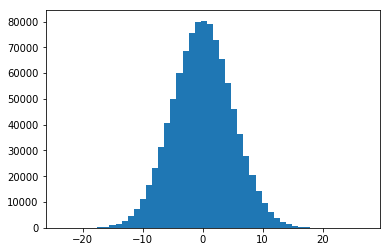

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(X, bins=50);

## 💡Ejercicio

Cree:

- Una matriz de 20 filas y 5 columnas con valores flotantes equiespaciados en el intervalo cerrado $[1, 10]$
- Un array unidimensional con 128 valores aleatorios de una distribución normal $\mu=1, \sigma=2$

In [68]:
# Write your code here!

## ⭐️ Solución

In [69]:
# %load "solutions/numpy/rand_arrays.py"

# Muestra aleatoria de un conjunto de valores

Supongamos que queremos generar una muestra aleatoria de un millón de lanzamientos de una moneda:

In [70]:
coins = np.random.choice(['head', 'tail'], size=1_000_000)
coins

array(['tail', 'head', 'head', ..., 'tail', 'tail', 'tail'], dtype='<U4')

In [71]:
heads = np.count_nonzero(coins == 'head')
tails = np.count_nonzero(coins == 'tail')

heads_pct = heads / coins.size * 100
tails_pct = tails / coins.size * 100

print(f'{heads_pct:.4}% heads')
print(f'{tails_pct:.4}% tails')

49.86% heads
50.14% tails


## Probabilidades no uniformes

Supongamos que vamos a una casa de apuestas. Tiramos un millón veces pero hay algo que no nos cuadra. El dado está trucado! 😱

In [72]:
dices = np.random.choice(range(1, 7), size=1_000_000, p=[.5, .1, .1, .1, .1, .1])
dices

array([4, 6, 4, ..., 2, 1, 1])

In [73]:
values, counts = np.unique(dices, return_counts=True)
for value, count in zip(values, counts):
    value_pct = count / dices.size * 100
    print(f'{value}: {value_pct:.4}%')

1: 50.08%
2: 9.995%
3: 9.993%
4: 10.0%
5: 9.962%
6: 9.968%


## Selección sin reemplazo

Axiomas:

- [Juego de Tronos](https://es.wikipedia.org/wiki/Game_of_Thrones) es una gran serie.
- En la serie se producen muchas muertes.
- Si una persona muere, no puede volver a morir (🤔)

Vamos a partir de 15 personajes de Juego de Tronos y dejar que NumPy elija quién vive 👍🏻 y quién muere 👎🏻. Sólo pueden quedar 3!

In [74]:
participants = ['Arya Stark', 'Daenerys Targaryen', 'Jon Snow', 'Melisandre', 'Bran Stark', 'Cersei Lannister',
                'Gendry', 'Gregor Clegane', 'Jorah Mormont', 'Sansa Stark', 'Theon Greyjoy', 'Tyrion Lannister',
               'Bronn', 'Brienne de Tarth', 'Tormund Giantsbane']

dead = np.random.choice(participants, size=len(participants) - 3, replace=False)
np.setdiff1d(participants, dead)   # alive

array(['Daenerys Targaryen', 'Gregor Clegane', 'Tyrion Lannister'],
      dtype='<U18')

# Acceso, borrado e inserción de elementos en arrays
---

![NumPy Arrays](images/numpy/numpy_arrays.png)

Photo by [Harriet Dashnow, Stéfan van der Walt, Juan Núñez-Iglesias](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch01.html) on [O'Reilly](https://www.oreilly.com/library/view/elegant-scipy/9781491922927/)

# Acceso a elementos de arrays unidimensionales

In [75]:
x = np.arange(10, 16)
x

array([10, 11, 12, 13, 14, 15])

In [76]:
for i in range(x.size):
    print(f'[{i}] {x[i]}')

[0] 10
[1] 11
[2] 12
[3] 13
[4] 14
[5] 15


In [77]:
for i in range(1, x.size + 1):
    print(f'[{-i}] {x[-i]}')

[-1] 15
[-2] 14
[-3] 13
[-4] 12
[-5] 11
[-6] 10


# Modificación de valores en arrays unidimensionales

In [78]:
x

array([10, 11, 12, 13, 14, 15])

In [79]:
x[0] *= 10
x[-1] /= 10

In [80]:
x

array([100,  11,  12,  13,  14,   1])

# Borrado e inserción en arrays unidimensionales

In [81]:
x

array([100,  11,  12,  13,  14,   1])

In [82]:
# borramos el primer y el cuarto elemento del array
x = np.delete(x, (0, 3))
x

array([11, 12, 14,  1])

In [83]:
x = np.append(x, 99)
x

array([11, 12, 14,  1, 99])

In [84]:
# insertamos [3, 7] delante del tercer elemento
x = np.insert(x, 2, [3, 7])
x

array([11, 12,  3,  7, 14,  1, 99])

# Acceso a alementos de arrays multidimensionales

In [85]:
X = np.random.randint(1, 12, size=(3, 4))
X

array([[5, 3, 5, 7],
       [2, 7, 1, 3],
       [9, 2, 5, 3]])

In [86]:
X[0, 0]

5

In [87]:
X[2, 3]

3

In [88]:
X[-1, -1]

3

In [89]:
X[[0, 2], [1, 3]]   # equivale a: X[0, 1], X[2, 3]

array([3, 3])

# Acceso a filas o columnas completas

In [90]:
X

array([[5, 3, 5, 7],
       [2, 7, 1, 3],
       [9, 2, 5, 3]])

In [91]:
X[2]   # tercera fila

array([9, 2, 5, 3])

In [92]:
X[:,1] # segunda columna

array([3, 7, 2])

# Modificación de valores de arrays multidimensionales

In [93]:
X

array([[5, 3, 5, 7],
       [2, 7, 1, 3],
       [9, 2, 5, 3]])

In [94]:
X[1, 1] *= 100
X

array([[  5,   3,   5,   7],
       [  2, 700,   1,   3],
       [  9,   2,   5,   3]])

In [95]:
X[0] = [1, 2, 3, 4]
X

array([[  1,   2,   3,   4],
       [  2, 700,   1,   3],
       [  9,   2,   5,   3]])

In [96]:
X[:,2] = 5
X

array([[  1,   2,   5,   4],
       [  2, 700,   5,   3],
       [  9,   2,   5,   3]])

# Borrado en arrays multidimensionales

In [97]:
X

array([[  1,   2,   5,   4],
       [  2, 700,   5,   3],
       [  9,   2,   5,   3]])

In [98]:
# borramos la primera fila de la matriz
X = np.delete(X, 0, axis=0)
X

array([[  2, 700,   5,   3],
       [  9,   2,   5,   3]])

In [99]:
# borramos la segunda y cuarta columnas de la matriz
X = np.delete(X, (1, 3), axis=1)
X

array([[2, 5],
       [9, 5]])

# Añadiendo elementos a arrays multidimensionales

In [100]:
X

array([[2, 5],
       [9, 5]])

In [101]:
X = np.append(X, [[3, 7]], axis=0)
X

array([[2, 5],
       [9, 5],
       [3, 7]])

In [102]:
X = np.append(X, [[3], [4], [5]], axis=1)
X

array([[2, 5, 3],
       [9, 5, 4],
       [3, 7, 5]])

# Insertando elementos en arrays multidimensionales

In [103]:
X

array([[2, 5, 3],
       [9, 5, 4],
       [3, 7, 5]])

In [104]:
# insertamos [2, 2, 2] antes de la segunda fila
X = np.insert(X, 1, [2, 2, 2], axis=0)
X

array([[2, 5, 3],
       [2, 2, 2],
       [9, 5, 4],
       [3, 7, 5]])

In [105]:
# insertamos [9, 8, 7, 6] antes de la tercera columna
X = np.insert(X, 2, [9, 8, 7, 6], axis=1)
X

array([[2, 5, 9, 3],
       [2, 2, 8, 2],
       [9, 5, 7, 4],
       [3, 7, 6, 5]])

## 💡Ejercicio

Utilizando las operaciones de modificación, borrado e inserción, convierta la siguiente matriz:

$
\begin{align*}
  \begin{bmatrix}
    17 & 12 & 31 \\
    49 & 11 & 51 \\
    21 & 31 & 62 \\
    63 & 75 & 22
  \end{bmatrix}
\end{align*}
$

en ésta:

$
\begin{align*}
  \begin{bmatrix}
    17 & 12 & 31 & 63\\
    49 & 11 & 51 & 75\\
    21 & 31 & 62 & 22\\
  \end{bmatrix}
\end{align*}
$

y luego en ésta:

$
\begin{align*}
  \begin{bmatrix}
    17 & 12 & 31 & 63\\
    49 & 49 & 49 & 63\\
    21 & 31 & 62 & 63\\
  \end{bmatrix}
\end{align*}
$


In [106]:
# Write your code here!

## ⭐️ Solución

In [107]:
# %load "solutions/numpy/transform.py"

# Apilando matrices (vertical)

In [108]:
A = np.random.randint(1, 100, size=(3, 2))
B = np.random.randint(1, 100, size=(1, 2))

In [109]:
A

array([[32, 25],
       [37, 88],
       [89,  4]])

In [110]:
B

array([[76, 91]])

In [111]:
np.vstack((A, B))

array([[32, 25],
       [37, 88],
       [89,  4],
       [76, 91]])

# Apilando matrices (horizontal)

In [112]:
A = np.random.randint(1, 100, size=(3, 2))
B = np.random.randint(1, 100, size=(3, 1))

In [113]:
A

array([[66, 36],
       [70, 58],
       [77, 99]])

In [114]:
B

array([[88],
       [18],
       [58]])

In [115]:
np.hstack((A, B))

array([[66, 36, 88],
       [70, 58, 18],
       [77, 99, 58]])

# Repitiendo elementos con `tile`

In [116]:
X = np.random.randint(1, 100, size=(3, 2))
X

array([[29,  7],
       [79, 69],
       [86, 73]])

In [117]:
np.tile(X, 3)

array([[29,  7, 29,  7, 29,  7],
       [79, 69, 79, 69, 79, 69],
       [86, 73, 86, 73, 86, 73]])

In [118]:
np.tile(X, (2, 3))

array([[29,  7, 29,  7, 29,  7],
       [79, 69, 79, 69, 79, 69],
       [86, 73, 86, 73, 86, 73],
       [29,  7, 29,  7, 29,  7],
       [79, 69, 79, 69, 79, 69],
       [86, 73, 86, 73, 86, 73]])

# Repitiendo elementos con `repeat`

In [119]:
X

array([[29,  7],
       [79, 69],
       [86, 73]])

In [120]:
np.repeat(X, 2)

array([29, 29,  7,  7, 79, 79, 69, 69, 86, 86, 73, 73])

In [121]:
np.repeat(X, 2, axis=0)

array([[29,  7],
       [29,  7],
       [79, 69],
       [79, 69],
       [86, 73],
       [86, 73]])

In [122]:
np.repeat(X, 3, axis=1)

array([[29, 29, 29,  7,  7,  7],
       [79, 79, 79, 69, 69, 69],
       [86, 86, 86, 73, 73, 73]])

# *Slicing* de arrays
---

In [123]:
X = np.random.randint(1, 100, size=(5, 4))
X

array([[42, 87, 79, 28],
       [29, 62,  1, 16],
       [56, 74, 89, 63],
       [28, 59, 74, 93],
       [61, 26, 10, 38]])

In [124]:
X[:2]   # primeras 2 filas

array([[42, 87, 79, 28],
       [29, 62,  1, 16]])

In [125]:
X[:, -2:]    # últimas 2 columnas

array([[79, 28],
       [ 1, 16],
       [89, 63],
       [74, 93],
       [10, 38]])

In [126]:
X

array([[42, 87, 79, 28],
       [29, 62,  1, 16],
       [56, 74, 89, 63],
       [28, 59, 74, 93],
       [61, 26, 10, 38]])

In [127]:
X[::-1]    # filas en orden inverso

array([[61, 26, 10, 38],
       [28, 59, 74, 93],
       [56, 74, 89, 63],
       [29, 62,  1, 16],
       [42, 87, 79, 28]])

In [128]:
X[:, ::-1]    # columnas en orden inverso

array([[28, 79, 87, 42],
       [16,  1, 62, 29],
       [63, 89, 74, 56],
       [93, 74, 59, 28],
       [38, 10, 26, 61]])

# Subarrays (vistas de un array)

In [129]:
X

array([[42, 87, 79, 28],
       [29, 62,  1, 16],
       [56, 74, 89, 63],
       [28, 59, 74, 93],
       [61, 26, 10, 38]])

In [130]:
X[0:2, 0:2]

array([[42, 87],
       [29, 62]])

In [131]:
X[3:, 1:]

array([[59, 74, 93],
       [26, 10, 38]])

In [132]:
X[:, 2:]

array([[79, 28],
       [ 1, 16],
       [89, 63],
       [74, 93],
       [10, 38]])

# Modificación de vistas (subarrays)

In [133]:
X

array([[42, 87, 79, 28],
       [29, 62,  1, 16],
       [56, 74, 89, 63],
       [28, 59, 74, 93],
       [61, 26, 10, 38]])

In [134]:
my_array_view = X[2:, 2:]
my_array_view[0, 0] = 9999
my_array_view

array([[9999,   63],
       [  74,   93],
       [  10,   38]])

In [135]:
X

array([[  42,   87,   79,   28],
       [  29,   62,    1,   16],
       [  56,   74, 9999,   63],
       [  28,   59,   74,   93],
       [  61,   26,   10,   38]])

# Creando copias "desvinculadas" de arrays

In [136]:
X

array([[  42,   87,   79,   28],
       [  29,   62,    1,   16],
       [  56,   74, 9999,   63],
       [  28,   59,   74,   93],
       [  61,   26,   10,   38]])

In [137]:
my_array_view = np.copy(X[:, :2])
my_array_view[0, 0] = 1111
my_array_view

array([[1111,   87],
       [  29,   62],
       [  56,   74],
       [  28,   59],
       [  61,   26]])

In [138]:
X

array([[  42,   87,   79,   28],
       [  29,   62,    1,   16],
       [  56,   74, 9999,   63],
       [  28,   59,   74,   93],
       [  61,   26,   10,   38]])

# Extraer elementos con referencia de diagonal

In [139]:
X = np.array([[73, 86, 90, 20], [96, 55, 15, 48], [38, 63, 96, 95], [13, 87, 32, 96]])
X

array([[73, 86, 90, 20],
       [96, 55, 15, 48],
       [38, 63, 96, 95],
       [13, 87, 32, 96]])

![Diagonal](images/numpy/diagonal.png)

In [140]:
np.diag(X)

array([73, 55, 96, 96])

In [141]:
for k in range(1, X.shape[0]):
    print(f'k={k}', np.diag(X, k=k))

k=1 [86 15 95]
k=2 [90 48]
k=3 [20]


In [142]:
for k in range(1, X.shape[0]):
    print(f'k={-k}', np.diag(X, k=-k))

k=-1 [96 63 32]
k=-2 [38 87]
k=-3 [13]


## Modificando elementos de la diagonal principal

NumPy también provee un método que retorna los *índices de los elementos de la diagonal principal*, con lo que podemos modificar sus valores directamente:

In [143]:
X

array([[73, 86, 90, 20],
       [96, 55, 15, 48],
       [38, 63, 96, 95],
       [13, 87, 32, 96]])

In [144]:
di = np.diag_indices(X.shape[0])
di

(array([0, 1, 2, 3]), array([0, 1, 2, 3]))

In [145]:
X[di] = 1
X

array([[ 1, 86, 90, 20],
       [96,  1, 15, 48],
       [38, 63,  1, 95],
       [13, 87, 32,  1]])

# Indexado booleano, operaciones de conjunto y ordenación
---

# Indexado booleano

In [146]:
X

array([[ 1, 86, 90, 20],
       [96,  1, 15, 48],
       [38, 63,  1, 95],
       [13, 87, 32,  1]])

In [147]:
X > 5    # devuelve un array booleano

array([[False,  True,  True,  True],
       [ True, False,  True,  True],
       [ True,  True, False,  True],
       [ True,  True,  True, False]])

In [148]:
X[X > 5]    # devuelve un array unidimensional con los valores

array([86, 90, 20, 96, 15, 48, 38, 63, 95, 13, 87, 32])

## Condiciones compuestas

In [149]:
X

array([[ 1, 86, 90, 20],
       [96,  1, 15, 48],
       [38, 63,  1, 95],
       [13, 87, 32,  1]])

In [150]:
X[(X == 1) | (X > 8)]

array([ 1, 86, 90, 20, 96,  1, 15, 48, 38, 63,  1, 95, 13, 87, 32,  1])

In [151]:
# los paréntesis son obligatorios para que funcione
X[(X > 3) & (X < 6)]

array([], dtype=int64)

## Modificando valores

Supongamos que queremos que todos los valores menores de 5 sean incrementados un 25%:

In [152]:
X

array([[ 1, 86, 90, 20],
       [96,  1, 15, 48],
       [38, 63,  1, 95],
       [13, 87, 32,  1]])

In [153]:
X[X < 5] *= 1.25

TypeError: Cannot cast ufunc multiply output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

Convertimos la matriz a valores flotantes para poder hacer la operación:

In [154]:
X = X.astype(float)
X

array([[ 1., 86., 90., 20.],
       [96.,  1., 15., 48.],
       [38., 63.,  1., 95.],
       [13., 87., 32.,  1.]])

In [155]:
X[X < 5] *= 1.25
X

array([[ 1.25, 86.  , 90.  , 20.  ],
       [96.  ,  1.25, 15.  , 48.  ],
       [38.  , 63.  ,  1.25, 95.  ],
       [13.  , 87.  , 32.  ,  1.25]])

## 💡Ejercicio

Extraiga todos los números impares del array $\big[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 \big]$

In [156]:
# Write your code here!

## ⭐️ Solución

In [157]:
# %load "solutions/numpy/extract_odds.py"

# Comprobando si dos arrays son iguales

In [158]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [3, 4]])
C = np.array([[1, 3], [2, 4]])

In [159]:
A == B

array([[ True,  True],
       [ True,  True]])

In [160]:
np.array_equal(A, B)

True

In [161]:
A == C

array([[ True, False],
       [False,  True]])

In [162]:
np.array_equal(A, C)

False

# Obteniendo índices en vez de valores

Supongamos que queremos obtener aquellos **índices** de la matriz $\mathcal{M}$ que satisfacen una condición concreta:

In [163]:
M = np.random.randint(1, 100, size=(4, 4))
M

array([[26, 60, 86, 22],
       [54, 17, 55, 61],
       [52, 99, 53, 66],
       [98, 60, 90, 14]])

In [164]:
M > 50

array([[False,  True,  True, False],
       [ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True, False]])

In [165]:
M[M > 50]

array([60, 86, 54, 55, 61, 52, 99, 53, 66, 98, 60, 90])

## ¿Y los índices? $\Rightarrow$ Usar `where`

In [166]:
idx = np.where(M > 50)
idx

(array([0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3]),
 array([1, 2, 0, 2, 3, 0, 1, 2, 3, 0, 1, 2]))

In [167]:
M[idx]

array([60, 86, 54, 55, 61, 52, 99, 53, 66, 98, 60, 90])

## 💡Ejercicio

Partiendo de una matriz de 10 filas y 10 columnas con valores aleatorios enteros en el intervalo $[0, 100]$, realice las operaciones necesarias para obtener una matriz de las mismas dimensiones donde:

- Todos los elementos de la diagonal sean 50.
- Los elementos mayores que 50 tengan valor 100.
- Los elementos menores que 50 tengan valor 0.

In [168]:
# Write your code here!

## ⭐️ Solución

In [169]:
# %load "solutions/numpy/diag_transform.py"

# Operaciones de conjunto

In [170]:
x, y = np.random.randint(1, 20, 10), np.random.randint(1, 20, 10)
print('x =', x)
print('y =', y)

x = [12 16 18  2  1  1 10 19 17  1]
y = [ 5  5 11 12  7  6  1 13  7 15]


In [171]:
np.intersect1d(x, y)

array([ 1, 12])

In [172]:
np.setdiff1d(x, y)

array([ 2, 10, 16, 17, 18, 19])

In [173]:
np.union1d(x, y)

array([ 1,  2,  5,  6,  7, 10, 11, 12, 13, 15, 16, 17, 18, 19])

# Ordenación en arrays unidimensionales

In [174]:
x

array([12, 16, 18,  2,  1,  1, 10, 19, 17,  1])

In [175]:
np.sort(x)    # devuelve un nuevo array ordenado

array([ 1,  1,  1,  2, 10, 12, 16, 17, 18, 19])

In [176]:
y.sort()    # ordena el array "in-place"

In [177]:
y

array([ 1,  5,  5,  6,  7,  7, 11, 12, 13, 15])

# Cambiando los métodos de ordenación

In [178]:
big_array = np.random.uniform(1, 10000, 10_000_000)

### Quicksort

In [179]:
%timeit np.sort(big_array, kind='quicksort')  # método por defecto

937 ms ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Mergesort

In [180]:
%timeit np.sort(big_array, kind='mergesort')

1.18 s ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Heapsort

In [181]:
%timeit np.sort(big_array, kind='heapsort')

3.12 s ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Ordenación en arrays multidimensionales

In [182]:
X = np.random.randint(1, 100, size=(4, 4))
X

array([[47, 56, 96, 88],
       [47, 85, 83, 20],
       [99, 43, 80, 16],
       [29, 41, 21, 97]])

In [183]:
# ordenamos por filas (dirección eje de columnas)
# equivale a np.sort(X)
np.sort(X, axis=1)

array([[47, 56, 88, 96],
       [20, 47, 83, 85],
       [16, 43, 80, 99],
       [21, 29, 41, 97]])

In [184]:
# ordenamos por columnas (dirección eje de filas)
np.sort(X, axis=0)

array([[29, 41, 21, 16],
       [47, 43, 80, 20],
       [47, 56, 83, 88],
       [99, 85, 96, 97]])

# Contando valores

Supongamos que tenemos una distribución aleatoria uniforme de valores enteros entre 1 y 10:

In [185]:
X = np.random.randint(1, 11, size=1000)

Queremos obtener los valores **únicos** que hay en el array:

In [186]:
np.unique(X)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Pero ahora queremos obtener también cuantas apariciones hay de cada valor:

In [187]:
np.unique(X, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([102, 106, 104,  83,  95, 104, 113,  94, 104,  95]))

## Contando a partir de filtrado

NumPy nos ofrece una función para contar los valores distintos de cero dentro de un array:

In [188]:
np.count_nonzero(X)

1000

Pero podemos utilizarlo para propósitos más ambiciosos. Supongamos que queremos saber cuántos valores de nuestro array son mayores que 5:

In [189]:
np.count_nonzero(X > 5)

510

# Operaciones aritméticas y broadcasting
---

# Operaciones aritméticas entre arrays

In [190]:
X, Y = np.random.randint(1, 100, size=(3, 3)), np.random.randint(1, 100, size=(3, 3))
print(f'X = {os.linesep}{X}')
print()
print(f'Y = {os.linesep}{Y}')

X = 
[[42 22 18]
 [ 2 66 22]
 [88 48 23]]

Y = 
[[70 77 57]
 [73 88 22]
 [26 69 25]]


In [191]:
X + Y

array([[112,  99,  75],
       [ 75, 154,  44],
       [114, 117,  48]])

In [192]:
X - Y

array([[-28, -55, -39],
       [-71, -22,   0],
       [ 62, -21,  -2]])

In [193]:
print(f'X = {os.linesep}{X}')
print()
print(f'Y = {os.linesep}{Y}')

X = 
[[42 22 18]
 [ 2 66 22]
 [88 48 23]]

Y = 
[[70 77 57]
 [73 88 22]
 [26 69 25]]


In [194]:
X * Y

array([[2940, 1694, 1026],
       [ 146, 5808,  484],
       [2288, 3312,  575]])

In [195]:
X / Y

array([[0.6       , 0.28571429, 0.31578947],
       [0.02739726, 0.75      , 1.        ],
       [3.38461538, 0.69565217, 0.92      ]])

# Operaciones aritméticas entre arrays de distintas dimensiones

## Suma con array "fila"

In [196]:
X = np.random.randint(1, 10, size=(2, 3))
X

array([[2, 4, 1],
       [2, 4, 6]])

In [197]:
y = np.random.randint(1, 10, size=(1, 3))
y

array([[7, 9, 1]])

In [198]:
X + y    # se produce un "broadcasting" de valores de y

array([[ 9, 13,  2],
       [ 9, 13,  7]])

## Suma con array "columna"

In [199]:
X

array([[2, 4, 1],
       [2, 4, 6]])

In [200]:
y = np.random.randint(1, 10, size=(2, 1))
y

array([[1],
       [6]])

In [201]:
X + y    # se produce un "broadcasting" de valores de y

array([[ 3,  5,  2],
       [ 8, 10, 12]])

## Broadcasting con dimensiones no compatibles

In [202]:
zeros32 = np.zeros((3, 2))
zeros21 = np.zeros((2, 1))

In [203]:
zeros32

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [204]:
zeros21

array([[0.],
       [0.]])

In [205]:
zeros32 + zeros21

ValueError: operands could not be broadcast together with shapes (3,2) (2,1) 

# Operaciones entre arrays y escalares

In [ ]:
X

In [ ]:
X + 10

In [ ]:
X - 10

In [ ]:
X

In [ ]:
X * 10

In [ ]:
X / 10

In [ ]:
X ** 3

# Funciones universales sobre arrays

Las funciones universales (**ufunc**) son funciones que operan sobre arrays **elemento a elemento**. Existen [muchas funciones universales definidas en Numpy](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

In [ ]:
X = np.random.randint(1, 100, size=(3, 3))
X

In [ ]:
# Ejemplo de función universal de operación matemática
np.sqrt(X)

In [ ]:
# Ejemplo de función universal trigonométrica
np.sin(X)

# Funciones de reducción sobre arrays

Es posible utilizar cualquier función universal para realizar reducción sobre un array.

In [ ]:
X

In [ ]:
np.add.reduce(X, axis=0)

In [ ]:
np.add.reduce(X, axis=1)

# Suma y producto sobre un array

In [ ]:
X

In [ ]:
np.sum(X)

In [ ]:
np.sum(X, axis=1)

In [ ]:
np.prod(X)

In [ ]:
np.prod(X, axis=0)

## 💡Ejercicio

Compruebe que, para $\theta=2\pi$ (*radianes*) y $k=20$ se cumple la siguiente igualdad del *producto infinito de Euler*:

$$
\cos\left({\frac{\theta}{2}}\right) \cdot
\cos\left({\frac{\theta}{4}}\right) \cdot
\cos\left({\frac{\theta}{8}}\right) \cdots
=
\prod_{i=1}^k \cos\left(\frac{\theta}{2^i}\right)
\approx
\frac{\sin(\theta)}{\theta}
$$


In [ ]:
# Write your code here!

## ⭐️ Solución

In [ ]:
# %load "solutions/numpy/euler_product.py"

# Funciones estadísticas sobre un array

In [ ]:
X

In [ ]:
np.mean(X), np.mean(X, axis=0)

In [ ]:
np.std(X), np.std(X, axis=1)

In [ ]:
np.median(X), np.median(X, axis=0)

# Encontrando máximos y mínimos

In [ ]:
X

In [ ]:
np.min(X), np.min(X, axis=0)

In [ ]:
np.max(X), np.max(X, axis=1)

## Índices de máximos y mínimos

In [ ]:
X

In [ ]:
np.argmin(X), np.argmin(X, axis=0)

In [ ]:
np.argmax(X), np.argmax(X, axis=1)

# Vectorizando funciones

Supongamos que queremos calcular el valor máximo entre dos matrices elemento a elemento. Podemos hacer una función que reciba *arrays* como parámetros e indicar su *vectorización* usando decorador:

In [206]:
@np.vectorize
def maxx(x, y):
    return x if x > y else y

In [207]:
X = np.random.randint(1, 100, size=(3, 3))
Y = np.random.randint(1, 100, size=(3, 3))

In [208]:
print(f'X = {os.linesep}{X}')
print()
print(f'Y = {os.linesep}{Y}')

X = 
[[20 94 26]
 [41 43 21]
 [33 91 95]]

Y = 
[[23 10 22]
 [56 56 72]
 [82 63 12]]


In [209]:
maxx(X, Y)

array([[23, 94, 26],
       [56, 56, 72],
       [82, 91, 95]])

## 💡Ejercicio

1. Cree dos matrices cuadradas de 20x20 con valores aleatorios flotantes uniformes en el intervalo $[0, 1000)$
2. Vectorice una función que devuelva la media (elemento a elemento) entre las dos matrices.
3. Realice la misma operación que en 2) pero usando suma de matrices y división por escalar.
4. Compute los tiempos de ejecución de 2) y 3)

In [234]:
# Write your code here!

## ⭐️ Solución

In [235]:
# %load "solutions/numpy/vectorize.py"

# Álgebra lineal
---

# Producto de matrices

In [236]:
A = np.random.randint(1, 10, size=(3, 3))
B = np.random.randint(1, 10, size=(3, 3))

print(f'A: {os.linesep}{A}')
print()
print(f'B: {os.linesep}{B}')

A: 
[[9 3 8]
 [6 4 1]
 [4 3 6]]

B: 
[[3 9 8]
 [4 7 1]
 [4 1 9]]


In [237]:
np.dot(A, B)

array([[ 71, 110, 147],
       [ 38,  83,  61],
       [ 48,  63,  89]])

# Valores propios (*Eigenvalues*)

In [238]:
np.linalg.eig(A)

(array([15.5226247 +0.j        ,  1.73868765+1.99974338j,
         1.73868765-1.99974338j]),
 array([[ 0.76951418+0.j        ,  0.2834425 -0.33165951j,
          0.2834425 +0.33165951j],
        [ 0.44080157+0.j        , -0.80913889+0.j        ,
         -0.80913889-0.j        ],
        [ 0.46210594+0.j        ,  0.12906076+0.37188695j,
          0.12906076-0.37188695j]]))

# Determinante

In [239]:
np.linalg.det(A)

108.99999999999997

In [240]:
np.linalg.det(B)

-293.99999999999994

# Inversa

In [241]:
A

array([[9, 3, 8],
       [6, 4, 1],
       [4, 3, 6]])

In [242]:
np.linalg.inv(A)

array([[ 0.19266055,  0.05504587, -0.26605505],
       [-0.29357798,  0.20183486,  0.35779817],
       [ 0.01834862, -0.13761468,  0.16513761]])

# Traspuesta

In [243]:
A.transpose()   # equivalente a A.T

array([[9, 6, 4],
       [3, 4, 3],
       [8, 1, 6]])

In [244]:
np.array_equal(A.transpose(), A.T)

True

# Elevar una matriz a una potencia

In [245]:
A

array([[9, 3, 8],
       [6, 4, 1],
       [4, 3, 6]])

$\mathcal{A}^3$:

In [246]:
np.linalg.matrix_power(A, 3)

array([[2049, 1014, 1849],
       [1192,  568, 1041],
       [1238,  615, 1092]])

# ¿Es eficiente?

In [247]:
big_matrix = np.random.randint(0, 1000, size=(100, 100))

Función recursiva para multiplicar matrices "a mano":

In [248]:
def custom_matrix_power(matrix, power):
    if power == 1:
        return matrix
    else:
        return np.dot(matrix, custom_matrix_power(matrix, power - 1))

In [249]:
%timeit custom_matrix_power(big_matrix, 25)

14.9 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [250]:
%timeit np.linalg.matrix_power(big_matrix, 25)

3.84 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Sistemas de ecuaciones lineales

$
\begin{cases}
    -x_1 + 2x_3 = 1\\
    x_1 - x_2 = -2\\
    x_2 + x_3 = -1
\end{cases}
\Longrightarrow
\begin{pmatrix}
    1 & 0 & 2 \\
    1 & -1 & 0 \\
    0 & 1 & 1
\end{pmatrix}
\begin{pmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{pmatrix}=
\begin{pmatrix}
    1 \\
    -2 \\
    -1
\end{pmatrix}
\Longrightarrow
\mathcal{A} \mathcal{X} = \mathcal{B}
$

In [251]:
A = np.array([[1, 0, 2], [1, -1, 0], [0, 1, 1]])
A

array([[ 1,  0,  2],
       [ 1, -1,  0],
       [ 0,  1,  1]])

In [252]:
B = np.array([1, -2, -1]).reshape(-1, 1)
B

array([[ 1],
       [-2],
       [-1]])

In [253]:
np.linalg.solve(A, B)

array([[-7.],
       [-5.],
       [ 4.]])

La solución al sistema debe ser la misma que si calculamos:

$
\begin{align*}
    \mathcal{X} = \mathcal{A}^{-1} \mathcal{B}
\end{align*}
$

In [254]:
np.dot(np.linalg.inv(A), B)

array([[-7.],
       [-5.],
       [ 4.]])

## 💡Ejercicio

Dadas las matrices:

$
A=
\begin{bmatrix}
  1 & 2 \\
  1 & 4
\end{bmatrix}
;\
B=
\begin{bmatrix}
  -3 & 4 \\
  2 & 0
\end{bmatrix}
;\
C=
\begin{bmatrix}
  0 & -2 \\
  3 & 1
\end{bmatrix}
;\
D=
\begin{bmatrix}
  1 & -3 \\
  -1 & 2
\end{bmatrix}
$

, calcule:

- $A + B - C$
- $A - B + (C - D)$
- $2A - B$
- $A - 2B + 3C$
- $3(A + B) + \frac{1}{2}(B - C) + 2(A - C)$
- $A(B + C)$
- $AB + AC$
- $A(B + C (A+B))$

In [255]:
# Write your code here!

## ⭐️ Solución

In [256]:
# %load "solutions/numpy/matrix_arithmetics.py"

## 💡Ejercicio

Una matriz es *idempotente* si $A^2 = A$. Compruebe si las matrices siguientes lo son:

$
A=
\begin{bmatrix}
  25 & -20 \\
  30 & -24
\end{bmatrix}
;\
B=
\begin{bmatrix}
  4 & -3 \\
  2 & -1
\end{bmatrix}
;\
C=
\begin{bmatrix}
  3 & -1 \\
  6 & -2
\end{bmatrix}
$

In [257]:
# Write your code here!

## ⭐️ Solución

In [258]:
# %load "solutions/numpy/idempotent.py"

## 💡Ejercicio

Resuelva el siguiente sistema de ecuaciones:

$
\begin{cases}
    3x + 4y - z = 8\\
    5x - 2y + z = 4\\
    2x - 2y + z = 1
\end{cases}
$

In [259]:
# Write your code here!

## ⭐️ Solución

In [260]:
# %load "solutions/numpy/lineq.py"

## 💡Ejercicio

Compruebe que la matriz
$
\begin{bmatrix}
  1 & 2 \\
  3 & 5
\end{bmatrix}
$
satisface la ecuación matricial: $X^2 - 6X - I = 0$, donde $I$ es la matriz identidad de orden 2.

In [261]:
# Write your code here!

## ⭐️ Solución

In [262]:
# %load "solutions/numpy/identity_equation.py"

## 💡Ejercicio

Dadas las matrices:

$
A=
\begin{bmatrix}
  1 & -2 & 1 \\
  3 & 0 & 1
\end{bmatrix}
;\
B=
\begin{bmatrix}
  4 & 0 & -1 \\
  -2 & 1 & 0
\end{bmatrix}
$

, compruebe que se cumplen las siguientes igualdades:

- $(A + B)^t = A^t + B^t$
- $(3A)^t = 3A^t$

In [263]:
# Write your code here!

## ⭐️ Solución

In [264]:
# %load "solutions/numpy/transpose.py"

## 💡Ejercicio

Dada la matriz
$
A =
\begin{bmatrix}
  4 & 5 & -1 \\
  -3 & -4 & 1 \\
  -3 & -4 & 0
\end{bmatrix}
$
, calcule: $A^2, A^3, \dots, A^{128}$

¿Nota algo especial en los resultados?

In [265]:
# Write your code here!

## ⭐️ Solución

In [267]:
# %load "solutions/numpy/flip_powers.py"